<a href="https://colab.research.google.com/github/HiyaJain22/hello/blob/main/ML2_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X=iris.data
y=iris.target.reshape(-1, 1)

In [ ]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
def sigmoid(Z):
  A = 1/(1+np.exp(np.dot(-1, Z)))
  return A

In [ ]:
def error(y, y_pred):
  return  np.sum( ( y - y_pred ) ** 2 ) / np.size( y )

In [ ]:
def accuracy(y, y_pred):
  acc = y.argmax(axis = 1) == y_pred.argmax(axis = 1)
  return acc.mean()

In [ ]:
def forward_prop(X_train, y_train, v, w):
  Zin = np.dot(X_train, v)
  Z = sigmoid(Zin)
  Yin = np.dot(Z, w)
  Ynet = sigmoid(Yin)
  mse = [error(y_train, Ynet), accuracy(y_train, Ynet)]
  print('Error: ', error(y_train, Ynet), ' Accuracy: ', accuracy(y_train, Ynet))
  return Z, Ynet, mse

In [ ]:
def backprop(X_train, y_train, Z, Ynet, w, v, alpha):
  dy = (y_train - Ynet)*Ynet*(1-Ynet)
  dw = np.dot(Z.T, dy)
  dz = np.dot(dy, w.T)*Z*(1-Z)
  dv = np.dot(X_train.T, dz)
  w = w - alpha * dw
  v = v - alpha * dv
  return w, v

In [ ]:
def train(X, Y, epochs, alpha):
  v = np.random.normal(size = (4, 2))
  w = np.random.normal(size = (2, 1))
  mse_list = []

  for i in range(epochs):
      Z, Y_net, mse = forward_prop(X_train, y_train, v, w)
      w, v = backprop(X_train, y_train, Z, Y_net, w, v, alpha)
      mse_list.append(mse)
  return v, w, np.asarray(mse_list)

In [ ]:
v, w, mse = train(X_train, y_train, 5, 0.001)

Error:  1.03546965207252  Accuracy:  1.0
Error:  1.0410922736967927  Accuracy:  1.0
Error:  1.046413213624736  Accuracy:  1.0
Error:  1.051512760186775  Accuracy:  1.0
Error:  1.0564482933243873  Accuracy:  1.0


In [ ]:
print(mse)

[[1.03546965 1.        ]
 [1.04109227 1.        ]
 [1.04641321 1.        ]
 [1.05151276 1.        ]
 [1.05644829 1.        ]]


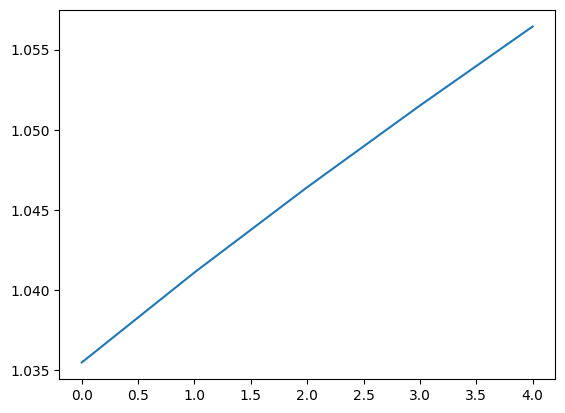

In [ ]:
plt.plot(mse[:,0])

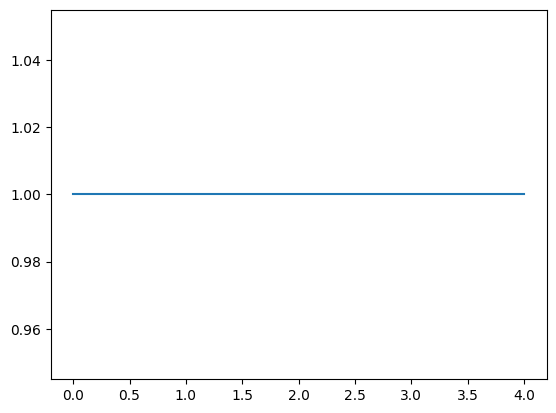

In [ ]:
plt.plot(mse[:,1])

In [ ]:
Z, Ynet, mse = forward_prop(X_test, y_test, v, w)
print(Ynet)

Error:  1.0676420066071293  Accuracy:  1.0
[[0.41555646]
 [0.40513814]
 [0.39820799]
 [0.52636708]
 [0.51217257]
 [0.40943104]
 [0.52184445]
 [0.4072847 ]
 [0.42096309]
 [0.40479834]
 [0.39180962]
 [0.38843423]
 [0.4023807 ]
 [0.51702175]
 [0.38823915]
 [0.39384985]
 [0.39818535]
 [0.51252564]
 [0.5046205 ]
 [0.40191169]
 [0.51986421]
 [0.40083807]
 [0.54470378]
 [0.40937432]
 [0.41554869]
 [0.40901025]
 [0.41092151]
 [0.39678428]
 [0.40573625]
 [0.42905923]]
